# МЕТРИКИ РЕГРЕССИИ

Метрика — это численное выражение качества моделирования.

## 1. Средняя абсолютная ошибка — MAE (Mean Absolute Error)

Это самый простой и уже знакомый вам показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

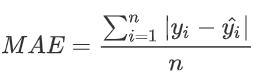

Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.

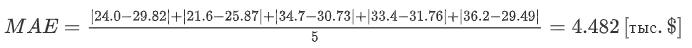

То есть для нашего примера из пяти наблюдений в среднем модель ошибается на 4.482 тысячи долларов.

## 2. Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error)

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.

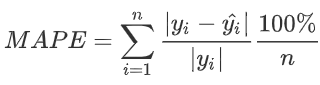

Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.

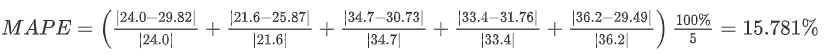

Таким образом, на первых пяти наблюдениях модель в среднем ошибается на 15.781 %. Это довольно неплохой результат.

## 3. Средняя квадратическая ошибка — MSE

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики.

Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

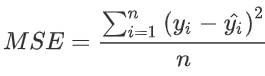

Данная метрика хуже поддаётся интерпретации, чем предыдущая, так как измеряется не в единицах, а в квадратах единиц. Она чаще используется для внутреннего обсуждения между дата-сайентистами, заказчику такая метрика может быть непонятна.


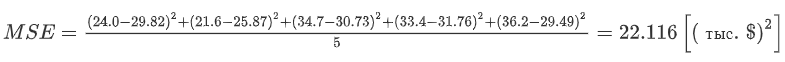

Таким образом, для нашего примера квадрат отклонения составляет 22.116 тысяч долларов в квадрате.

Согласитесь, не очень понятно, о чём идет речь. Однако данная метрика является популярной, так как позволяет «штрафовать» модель за очень большие ошибки.

### Что значит «штрафовать»? 

Например, расхождение в 200 единиц в метрике MSE воспринимается как , а в метрике MAE это расхождение воспринимается как 200. Поэтому, если у нас есть две модели, но одна из них допускает большие ошибки, эти ошибки становятся ещё больше при расчёте метрики MSE, и нам легче сравнить модели между собой.

Но в то же время это и проклятие MSE. Если в данных присутствуют выбросы, метрика может быть необъективной. Если модель будет утверждать, что цена здания — 30 тысяч долларов, а в наборе данных ему соответствует цена в 3 миллиона долларов, то при возведении такой ошибки в квадрат получится 9 миллионов, что может сбить с толку исследователя. Необходимо скептически относиться к данной метрике, если вы не проводили исследование данных на предмет наличия выбросов.

## Корень из средней квадратической ошибки — RMSE (Root Mean Squared Error)

Для получения RMSE надо просто извлечь квадратный корень из MSE:

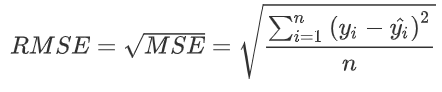

Корень извлекается для того, чтобы привести размерности ответов и ошибок в соответствие и сделать метрику более понятной.

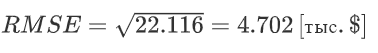

Преимущества и недостатки этой метрики такие же, как и у MSE, к преимуществам добавляется только понятная размерность.

## 5. Коэффициент детерминации (R^2)

Коэффициент детерминации, или R^2, является ещё одним показателем, который мы можем использовать для оценки модели. Он тесно связан с MSE, но его преимущество в том, что  всегда находится в промежутке между -(inf) и 1.

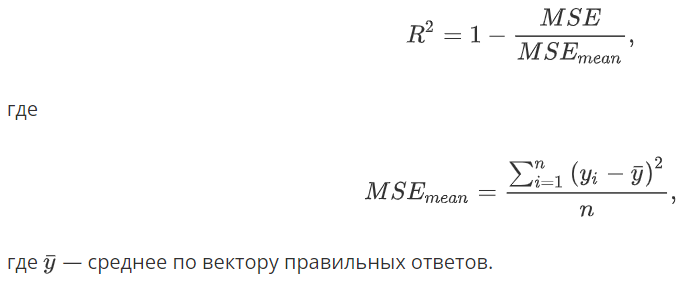

То есть R^2 показывает, насколько наша модель лучше, чем если бы все предсказания были средним по правильным ответам.

Посмотрим, как считается R^2. Сначала рассчитаем среднее по правильным ответам:

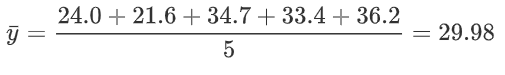

Теперь рассчитаем MSE(mean):

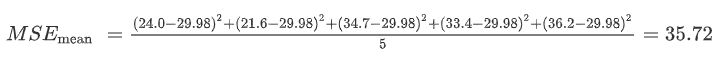

И, наконец, сам R^2:

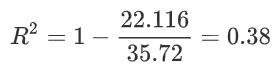

Есть ещё одна интерпретация данной метрики. Статистически показатель R^2 описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

Удовлетворительным R^2 считается показатель выше 0.5: чем ближе к 1, тем лучше. Отрицательные значения R^2 говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.

# РАСЧЁТ МЕТРИК НА PYTHON

Настало время проверить качество построенных нами ранее моделей линейной регрессии: lr_lstat и lr_full.

Весь набор функций для вычисления метрик в sklearn находится в модуле [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Давайте его импортируем:

In [1]:
from sklearn import metrics

Функции, которые нам понадобятся:

* mean_absolute_error() — расчёт MAE;
* mean_squared_error() — расчёт MSE;
* mean_absolute_percentage_error() — расчёт MAPE;
* r2_score() — расчёт коэффициента детерминации .

В каждую из функций достаточно передать правильные ответы и предсказания, и функция вернёт рассчитанную метрику.

Примечание. Для расчёта метрики RMSE нет специальной функции, однако мы знаем, что для её расчёта достаточно извлечь квадратный корень из MSE.

Из-за особенностей реализации функция mean_absolute_percentage_error() возвращает результат не в процентах, а в долях. Чтобы отобразить результат в процентах, необходимо умножить его на 100.

Давайте вычислим метрики и выведем их на экран, округлив до третьего знака после запятой. Начнём с модели lr_lstat:

In [ ]:
#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))
 
 
# MAE score: 4.505 thou. $
# RMSE score: 6.203 thou. $
# MAPE score: 21.352 %
# R2 score: 0.544

Проделываем ту же самую операцию для второй модели линейной регрессии, lr_full:

In [2]:
#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))
 

# MAE score: 3.271 thou. $
# RMSE score: 4.679 thou. $
# MAPE score: 16.417 %
# R2 score: 0.741

NameError: name 'lr_full' is not defined

Сравним полученные результаты:

* MAE : в среднем первая модель ошибается на  4.505 тыс. долларов, а вторая — на 3.271 тыс. долларов.
* RMSE : среднеквадратичное отклонение первой модели от истинных ответов составляет 6.203 тыс. долларов, а второй — 4.679.
* MAPE : первая модель ошибается на 21.352 %, а вторая — на 16.417 %.
* R^2 : доля объясняемой информации (дисперсии), которую улавливает первая модель, — 0.544, а вторая — 0.741.

Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

[Остальные метрики для задач регресии](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/#regression-metrics)

# Задания

3.2  вас есть истинные ответы y_true = [1.23, 2.35, 2.75] и предсказания модели y_pred = [1.01, 12.3, 2.74]. Посчитайте метрику RMSE, ответ округлите до двух знаков после точки-разделителя.

In [4]:
import numpy as np

y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

RMSE score: 5.746 thou. $


3.3 
Чему равен коэффициент детерминации на следующих данных?
Истинные ответы: y_true = [22.4, 20.6, 23.9, 22.0, 11.9]

Предсказанные ответы: y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

Ответ округлите до двух знаков после точки-разделителя.

In [5]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

print('R2 score: {:.3f}'.format(metrics.r2_score(y_true, y_pred)))

R2 score: 0.708


# НЕДОСТАТКИ АНАЛИТИЧЕСКОГО РЕШЕНИЯ

У  такого простого подхода есть один большой минус — это работа с большим количеством признаков.

Q = (X^T*X)^(-1)

X - тарица (m,n)
X^T - матрица (n, m)

если возмём матрицу (1300, 1300), то только для обращения матрица потребуется 1300^3 = 2197000000 операций.

Обращение матриц больших размеров может стать очень трудоёмким процессом при работе с большими объёмами данных.

Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.

Что это такое?

Представьте, что мы построили модель, но собираемся её уточнять в процессе эксплуатации. К нам приходят всё новые данные, и мы должны изменять параметры модели, подстраиваясь под новые зависимости.

Если мы используем метод fit() для модели LinearRegression и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты. То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.

Первая и вторая проблемы решаются с помощью замены аналитического МНК на численные методы, такие как градиентный спуск.

Третий недостаток МНК больше теоретический и заключается в том, что матрица  в результате вычислений может не существовать. Это связано с математическими особенностями вычисления обратной матрицы, которые мы рассмотрим далее в курсе. 

Причина этой проблемы — мультиколлинеарность факторов (сильная корреляционная связь). Из-за этого коэффициенты линейной регрессии становятся слишком большими и модель становится неустойчивой. 

Проблема решается с помощью регуляризации.

инкрементальное обучение - Обучение в режиме реального времени.
